In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10), # Dense(10, activation='relu')로 만들고 아래 Softmax()를 제거하면 같음
    Softmax()
])

In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),# data_format = 'channels_last' or 'channels_first' 
    MaxPooling2D((3,3)),                                         # padding='same', strides=2
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt, # optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc, mae]) # metrics=['accuracy', 'mae']

In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f12243c22b0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f12243c2080>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

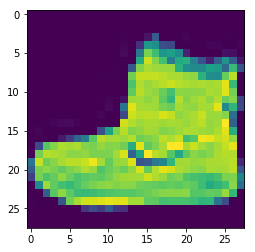

label: Ankle boot


In [15]:
# Display one of the images
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [16]:
train_images[..., np.newaxis].shape # [..., np.newaxis]: dummy channel

(60000, 28, 28, 1)

In [17]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 56s 936us/sample - loss: 0.5647 - sparse_categorical_accuracy: 0.8026 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 54s 900us/sample - loss: 0.3766 - sparse_categorical_accuracy: 0.8689 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 53s 878us/sample - loss: 0.3424 - sparse_categorical_accuracy: 0.8784 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 53s 875us/sample - loss: 0.3255 - sparse_categorical_accuracy: 0.8838 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 53s 877us/sample - loss: 0.3146 - sparse_categorical_accuracy: 0.8880 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 52s 870us/sample - loss: 0.3031 - sparse_categorical_accuracy: 0.8914 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 [============

#### Plot training history

In [18]:
print(type(history.history))
history.history

<class 'dict'>


{'loss': [0.5646621161619823,
  0.37662765816052757,
  0.34236351839701334,
  0.32553545249303184,
  0.31460444184144337,
  0.3031214190165202,
  0.29332112871805827,
  0.2853897253751755],
 'sparse_categorical_accuracy': [0.80255,
  0.8689167,
  0.87836665,
  0.88383335,
  0.8879667,
  0.89136666,
  0.8937333,
  0.8976],
 'mean_absolute_error': [4.4200006,
  4.4199996,
  4.4199996,
  4.4199996,
  4.4200006,
  4.42,
  4.4199996,
  4.42]}

In [19]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.564662,0.802550,4.420001
1,0.376628,0.868917,4.420000
2,0.342364,0.878367,4.420000
3,0.325535,0.883833,4.420000
4,0.314604,0.887967,4.420001
5,0.303121,0.891367,4.420000
6,0.293321,0.893733,4.420000
7,0.285390,0.897600,4.420000


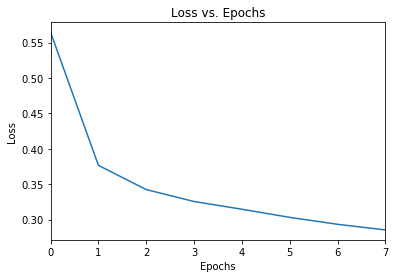

In [20]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss');

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.3328 - sparse_categorical_accuracy: 0.8830 - mean_absolute_error: 4.4200


#### Make predictions from the model

In [23]:
test_images.shape[0]

10000

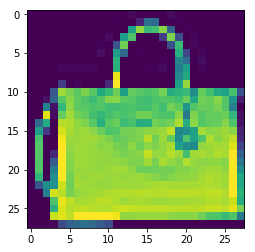

Label: Bag


In [24]:
# Choose a random test image
inx = 30 # random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [25]:
test_image.shape

(28, 28)

In [26]:
model.predict(test_image[np.newaxis, ..., np.newaxis])

array([[2.7041602e-09, 4.0262793e-11, 3.7902456e-08, 3.3394792e-07,
        7.6271803e-08, 4.1532491e-10, 2.9810087e-07, 5.6129264e-11,
        9.9999928e-01, 1.5926300e-11]], dtype=float32)

In [27]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model predcition: {labels[np.argmax(predictions)]}")

Model predcition: Bag
